## Importing Necessary Libraries

In the first step, we are importing our necessary libraries and define the path for our source extractor.

In [1]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib import patches
from astropy.io import fits
from astropy.nddata import Cutout2D

source_extractor = '/usr/local/bin/sex'
print('libraries imported')

libraries imported


In [2]:
pixscale = 0.262

fitspath = '/home/raditraian1107/PSF_development/FITS_images/'
fits_pathlist = sorted(glob.glob(fitspath+'*.fits'))
fits_list = sorted([os.path.basename(f) for f in glob.glob(fitspath+'*.fits')])

seinpath = os.path.join(fitspath, 'se_in_out/')
seoutpath = seinpath

os.makedirs(seinpath, exist_ok=True)

out_param_path = os.path.join(seinpath, 'default.param')

conv_filter = '/usr/local/share/sextractor/gauss_3.0_5x5.conv'
if not os.path.exists(conv_filter):
    raise FileNotFoundError(f"Convolution filter not found: {conv_filter}")

In [3]:
nnw_path = "/home/raditraian1107/PSF_development/FITS_images/se_in_out/default.nnw"
psf_path = "/home/raditraian1107/PSF_development/FITS_images/se_in_out/default.psf"

for i, filename in enumerate(fits_list, start=1):
    image_dir = fits_pathlist[i-1]
    base_name = filename.replace('.fits', '')
    cat_out_name = os.path.join(seoutpath, f'outparams_{base_name}.cat')

    template_path = os.path.join(seinpath, f'{base_name}.SEtemplate')
    with open(template_path, 'w') as text:
        text.write(f"""CATALOG_NAME     {cat_out_name}
CATALOG_TYPE     ASCII_HEAD
PARAMETERS_NAME  {out_param_path}

DETECT_TYPE      CCD
DETECT_MINAREA   5
DETECT_THRESH    1.0
ANALYSIS_THRESH  1.5

FILTER           Y
FILTER_NAME      {conv_filter}

DEBLEND_NTHRESH  32
DEBLEND_MINCONT  0.0005

CLEAN            Y
CLEAN_PARAM      1.0

WEIGHT_TYPE      NONE
WEIGHT_IMAGE     -

FLAG_IMAGE       flag.fits
FLAG_TYPE        OR

PHOT_APERTURES   10
PHOT_AUTOPARAMS  2.5, 3.5
PHOT_PETROPARAMS 2.0, 3.5
PHOT_AUTOAPERS   0.0,0.0

SATUR_LEVEL      100000.0
SATUR_KEY        SATURATE

MAG_ZEROPOINT    30.0
MAG_GAMMA        4.0
GAIN             0.0
GAIN_KEY         GAIN
PIXEL_SCALE      {pixscale}

SEEING_FWHM      0.5
STARNNW_NAME     {nnw_path}
PSF_NAME         {psf_path}

CHECKIMAGE_TYPE  SEGMENTATION,BACKGROUND,BACKGROUND_RMS
CHECKIMAGE_NAME  {seoutpath}/segmap_{base_name}.fits,{seoutpath}/bkg_{base_name}.fits,{seoutpath}/bkg_rms_{base_name}.fits

BACK_TYPE        AUTO
BACK_SIZE        64
BACK_FILTERSIZE  3

MEMORY_OBJSTACK  50000
MEMORY_PIXSTACK  3000000
MEMORY_BUFSIZE   8000

VERBOSE_TYPE     NORMAL
HEADER_SUFFIX    .head
WRITE_XML        N
XML_NAME         sex.xml
XSL_URL          file:///usr/local/share/sextractor/sextractor.xsl
""")

    print(f"\nSE template written for {base_name}")
    print(f"Running SExtractor for {base_name} ({i}/{len(fits_list)}) ...")

    os.system(f"{source_extractor} {image_dir} -c {template_path}")

    print(f"SExtractor ran for: {base_name}")

print(f"\nSExtractor ran for all {len(fits_list)} tiles.")



SE template written for cutout_251.0256_36.4566
Running SExtractor for cutout_251.0256_36.4566 (1/2) ...


> 
----- SExtractor 2.29.0 started on 2025-12-04 at 02:38:16 with 12 threads

> Setting catalog parameters
> Reading detection filter
> Initializing Neural Network
> Reading Neural Network Weights
> Initializing check-image(s)
> Initializing catalog
> Looking for cutout_251.0256_36.4566.fits

> WARNING: Maximum number of dimensions supported by this version of the software exceeded


----- Measuring from: cutout_251.0256_36.4566.fits
      "Unnamed" / no ext. header / 3000x3000 / 32 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:   64
> Setting up background map at line:  128
> Setting up background map at line:  192
> Setting up background map at line:  256
> Setting up background map at line:  320
> Setting up background map at line:  384
> Setting up background map at line:  448
> Setting up background map at line:  512
> Setting up background map at line:  576
> Setting up background map at line:  640
> Setting up backgro

SExtractor ran for: cutout_251.0256_36.4566

SE template written for masked_image
Running SExtractor for masked_image (2/2) ...


> Setting up background map at line: 1472
> Setting up background map at line: 1536
> Setting up background map at line: 1600
> Setting up background map at line: 1664
> Setting up background map at line: 1728
> Setting up background map at line: 1792
> Setting up background map at line: 1856
> Setting up background map at line: 1920
> Setting up background map at line: 1984
> Setting up background map at line: 2048
> Setting up background map at line: 2112
> Setting up background map at line: 2176
> Setting up background map at line: 2240
> Setting up background map at line: 2304
> Setting up background map at line: 2368
> Setting up background map at line: 2432
> Setting up background map at line: 2496
> Setting up background map at line: 2560
> Setting up background map at line: 2624
> Setting up background map at line: 2688
> Setting up background map at line: 2752
> Setting up background map at line: 2816
> Setting up background map at line: 2880
> Setting up background map at lin

SExtractor ran for: masked_image

SExtractor ran for all 2 tiles.


> Line: 3000  Objects:    15534 detected /     8400 sextracted
      Objects: detected 15534    / sextracted 8553            

> Closing files
> 
> All done (in 2.4 s: 1247.8 lines/s , 3557.6 detections/s)


In [4]:
from astropy.io import fits

fits_path = '/home/raditraian1107/PSF_development/FITS_images/cutout_251.0256_36.4566.fits'

with fits.open(fits_path) as hdul:
    header = hdul[0].header  
    data = hdul[0].data      

print(header)

for key, value in header.items():
    print(f"{key}: {value}")

SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    3 / number of data axes                            NAXIS1  =                 3000 / length of data axis 1                          NAXIS2  =                 3000 / length of data axis 2                          NAXIS3  =                    3 / length of data axis 3                          EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H SURVEY  = 'LegacySurvey'                                                        VERSION = 'DR9     '                                                            IMAGETYP= 'IMAGE   '           / None                                           BANDS   = 'grz     '                    

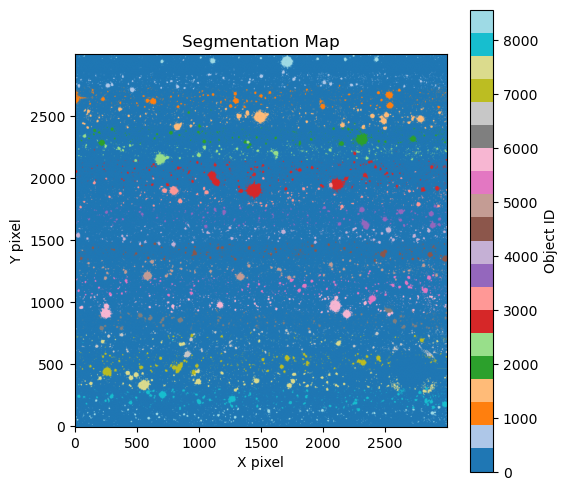

In [5]:
segmap_path = '/home/raditraian1107/PSF_development/FITS_images/se_in_out/segmap_cutout_251.0256_36.4566.fits'

seg_hdu = fits.open(segmap_path)
seg_data = seg_hdu[0].data
seg_hdu.close()

plt.figure(figsize=(6,6))
plt.imshow(seg_data, origin='lower', cmap='tab20') 
plt.colorbar(label='Object ID')
plt.title('Segmentation Map')
plt.xlabel('X pixel')
plt.ylabel('Y pixel')
plt.show()


##masking by replacing sources by 1 . contors over raw image, plot

FITS shape: (3, 3000, 3000)


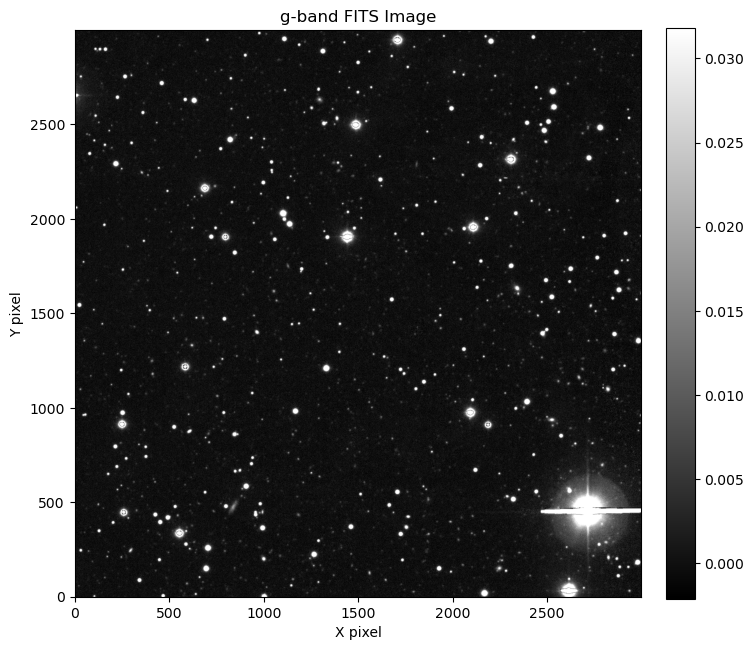

In [6]:
fits_path = '/home/raditraian1107/PSF_development/FITS_images/cutout_251.0256_36.4566.fits'

hdu = fits.open(fits_path)
image_data = hdu[0].data
hdu.close()

print("FITS shape:", image_data.shape)

if image_data.ndim == 3:
    slice0 = image_data[0]
else:
    slice0 = image_data
plt.figure(figsize=(8,8))
im = plt.imshow(slice0, origin='lower', cmap='gray',
                vmin=np.percentile(slice0, 5),
                vmax=np.percentile(slice0, 99))
plt.title('g-band FITS Image')
plt.xlabel('X pixel')
plt.ylabel('Y pixel')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.show()

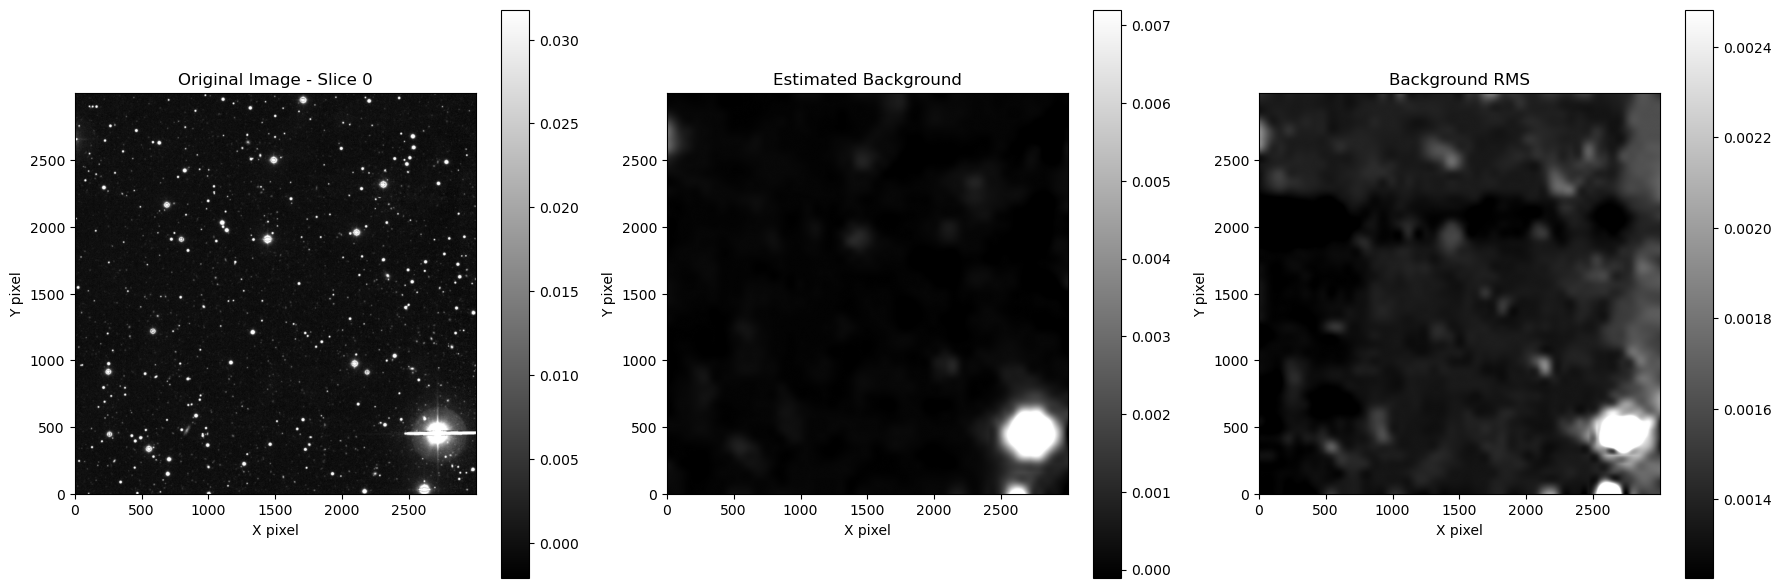

In [7]:
fits_path = '/home/raditraian1107/PSF_development/FITS_images/cutout_251.0256_36.4566.fits'
bkg_path = '/home/raditraian1107/PSF_development/FITS_images/se_in_out/bkg_cutout_251.0256_36.4566.fits'
bkg_rms_path = '/home/raditraian1107/PSF_development/FITS_images/se_in_out/bkg_rms_cutout_251.0256_36.4566.fits'

# Load data
with fits.open(fits_path) as hdul:
    raw_data = hdul[0].data

with fits.open(bkg_path) as hdul:
    bkg_data = hdul[0].data

with fits.open(bkg_rms_path) as hdul:
    bkg_rms_data = hdul[0].data

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Original slice i
i = 0  # choose slice 0, or loop over slices if you want
im0 = axs[0].imshow(raw_data[i], origin='lower', cmap='gray',
                    vmin=np.percentile(raw_data[i], 5),
                    vmax=np.percentile(raw_data[i], 99))
axs[0].set_title(f'Original Image - Slice {i}')
plt.colorbar(im0, ax=axs[0])

# Background (2D)
im1 = axs[1].imshow(bkg_data, origin='lower', cmap='gray',
                    vmin=np.percentile(bkg_data, 5),
                    vmax=np.percentile(bkg_data, 99))
axs[1].set_title('Estimated Background')
plt.colorbar(im1, ax=axs[1])

# Background RMS (2D)
im2 = axs[2].imshow(bkg_rms_data, origin='lower', cmap='gray',
                    vmin=np.percentile(bkg_rms_data, 5),
                    vmax=np.percentile(bkg_rms_data, 99))
axs[2].set_title('Background RMS')
plt.colorbar(im2, ax=axs[2])

for ax in axs:
    ax.set_xlabel('X pixel')
    ax.set_ylabel('Y pixel')

plt.tight_layout()
plt.show()

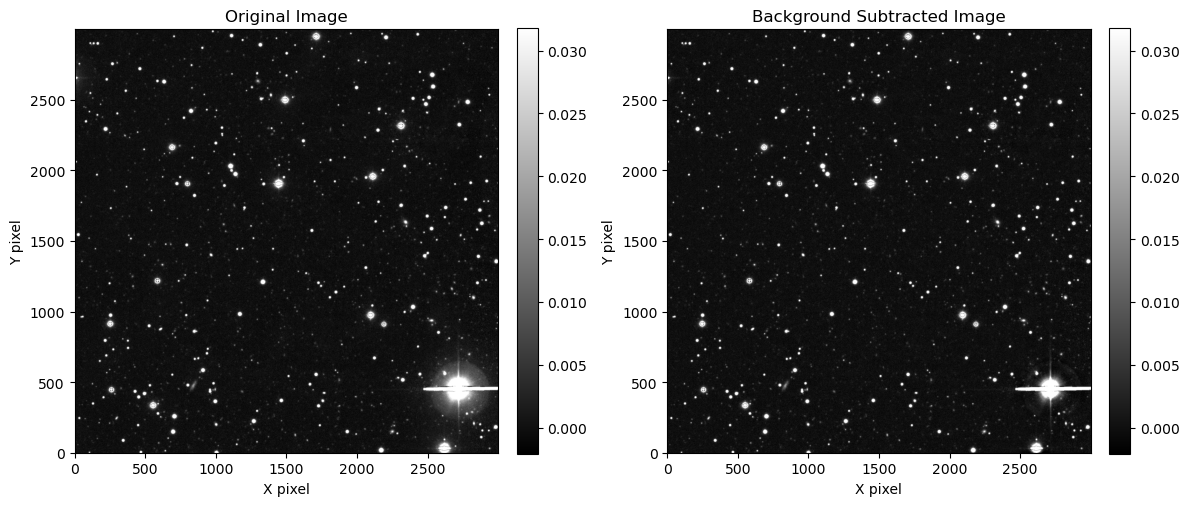

In [8]:
subtracted_data = raw_data - bkg_data  # broadcasting works if bkg_data is 2D

raw_slice = raw_data[0] if raw_data.ndim == 3 else raw_data
sub_slice = subtracted_data[0] if subtracted_data.ndim == 3 else subtracted_data
vmin, vmax = np.percentile(raw_slice, 5), np.percentile(raw_slice, 99)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

im0 = axes[0].imshow(raw_slice, origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
axes[0].set_title('Original Image')
axes[0].set_xlabel('X pixel')
axes[0].set_ylabel('Y pixel')
plt.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)

im1 = axes[1].imshow(sub_slice, origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
axes[1].set_title('Background Subtracted Image')
axes[1].set_xlabel('X pixel')
axes[1].set_ylabel('Y pixel')
plt.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

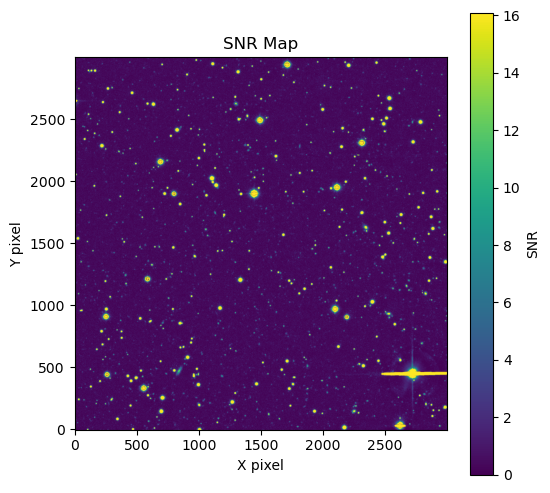

In [9]:
snr_map = (raw_data - bkg_data) / bkg_rms_data  # shape: (3, ny, nx)
snr_slice = snr_map[0] if snr_map.ndim == 3 else snr_map
plt.figure(figsize=(6,6))
plt.imshow(snr_slice, origin='lower', cmap='viridis', 
           vmin=0, vmax=np.percentile(snr_slice, 99))
plt.colorbar(label='SNR')
plt.title('SNR Map')
plt.xlabel('X pixel')
plt.ylabel('Y pixel')
plt.show()

Found 49 point sources
        X_IMAGE    Y_IMAGE  MAG_AUTO  CLASS_STAR
0     2732.3701   455.3794   17.1684       0.845
1      694.8843   152.0398   23.6492       0.837
2     1926.8713   152.9290   24.9485       0.821
5     2615.0662    33.9209   19.4085       0.845
10    2167.2878    21.2350   22.9440       0.844
28    1002.1141     4.9970   24.3515       0.837
113   2201.2615  2942.0771   24.0443       0.816
256   1312.0258  2889.7725   24.5994       0.821
876      9.1626  2654.8914   21.5905       0.996
914   2528.5657  2677.3430   23.3300       0.841
1174  2534.6245  2594.2378   23.9030       0.821
1344  1485.7910  2498.7170   20.5913       0.842
1375  2483.2676  2470.2070   24.1602       0.802
1407  2505.8330  2516.8950   24.7272       0.816
1445  2779.2278  2485.2976   23.5658       0.835
1622   821.4389  2421.6985   23.8569       0.831
1883  2304.2522  2315.7153   20.5899       0.841
1931  2719.7776  2324.9133   24.3249       0.805
2058   216.9860  2294.1851   24.0328       0.8

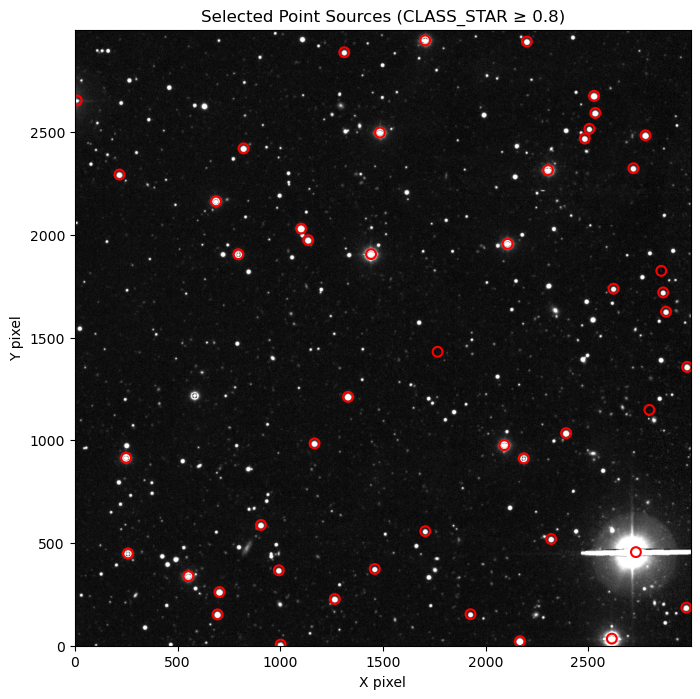

In [10]:
cat_file = f'{seoutpath}outparams_{base_name}.cat'
columns = []
with open(cat_file, 'r') as f:
    for line in f:
        if line.startswith('#'):
            parts = line.replace('#','').strip().split()
            if len(parts) >= 2:
                columns.append(parts[1])
        else:
            break

catalog = pd.read_csv(cat_file, comment='#', sep=r'\s+', names=columns)

point_sources = catalog[
    (catalog['CLASS_STAR'] >= 0.8)
    ]
#&
#    (catalog['FLAGS'] < 4)


print(f"Found {len(point_sources)} point sources")
print(point_sources[['X_IMAGE', 'Y_IMAGE', 'MAG_AUTO', 'CLASS_STAR']])

fits_file = f'/home/raditraian1107/PSF_development/FITS_images/{base_name}.fits'
with fits.open(fits_file) as hdul:
    img_data = hdul[0].data

if img_data.ndim == 3:
    for i in range(img_data.shape[0]):
        slice_data = img_data[i]

        plt.figure(figsize=(8,8))
        plt.imshow(slice_data, origin='lower', cmap='gray',
                   vmin=np.percentile(slice_data, 5),
                   vmax=np.percentile(slice_data, 99))

        plt.scatter(point_sources['X_IMAGE'], point_sources['Y_IMAGE'],
                    s=50, edgecolor='red', facecolors='none', linewidths=1.5, marker='o')

        plt.title(f'Slice {i}: Point Sources (CLASS_STAR ≥ 0.8, FLAGS < 4)')
        plt.xlabel('X pixel')
        plt.ylabel('Y pixel')
        plt.show()

else:
    plt.figure(figsize=(8,8))
    plt.imshow(img_data, origin='lower', cmap='gray',
               vmin=np.percentile(img_data, 5),
               vmax=np.percentile(img_data, 99))

    plt.scatter(point_sources['X_IMAGE'], point_sources['Y_IMAGE'],
                s=50, edgecolor='red', facecolors='none', linewidths=1.5, marker='o')

    plt.title('Selected Point Sources (CLASS_STAR ≥ 0.8)')
    plt.xlabel('X pixel')
    plt.ylabel('Y pixel')
    plt.show()


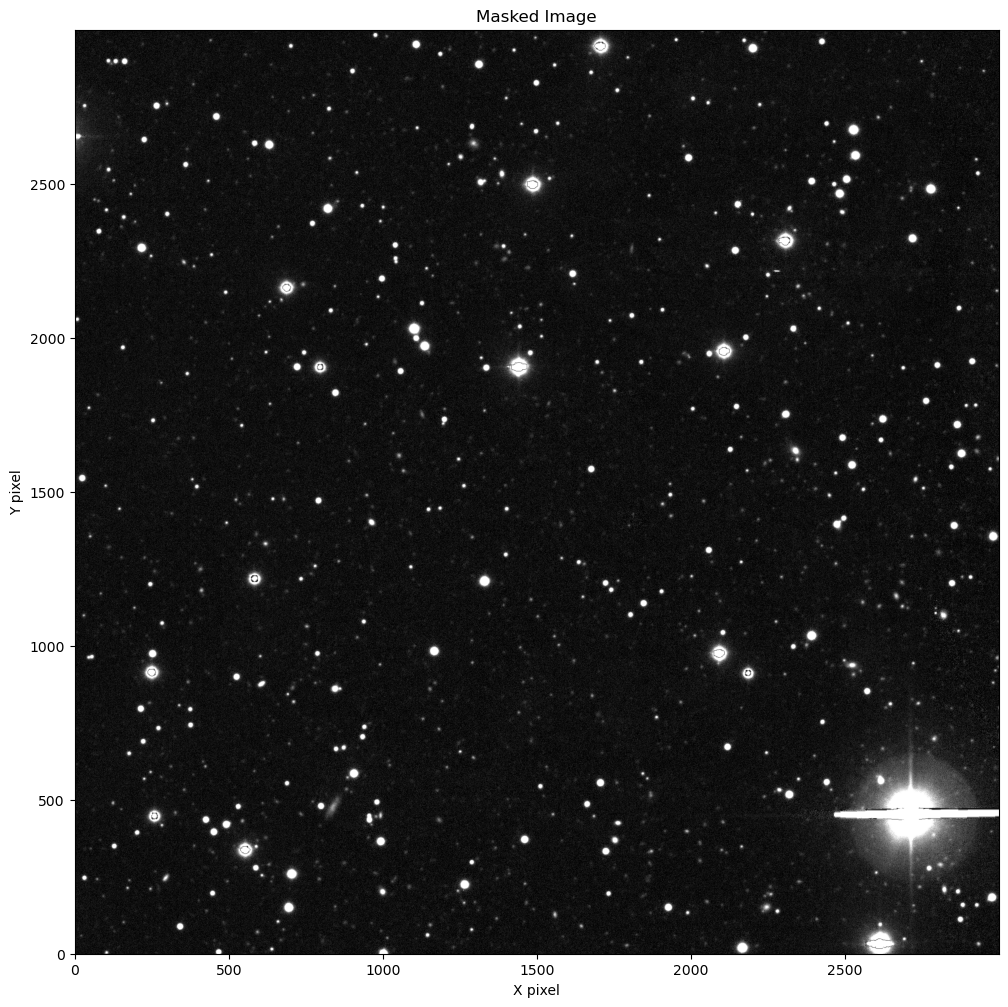

In [11]:
with fits.open(fits_file) as hdul:
    img_data = hdul[0].data
    if img_data.ndim > 2:
        img_data = img_data[0]

masked_img = img_data.copy()
for x, y in zip(point_sources['X_IMAGE'], point_sources['Y_IMAGE']):
    xi, yi = int(round(x)), int(round(y))
    
    masked_img[yi, xi] = 1 

plt.figure(figsize=(12,12))  
plt.imshow(masked_img, origin='lower', cmap='gray',
           vmin=np.percentile(masked_img, 5),
           vmax=np.percentile(masked_img, 99))
plt.title('Masked Image')
plt.xlabel('X pixel')
plt.ylabel('Y pixel')

data_to_save = masked_img.astype(np.float32)
fits.writeto("masked_image.fits", data_to_save, overwrite=True)

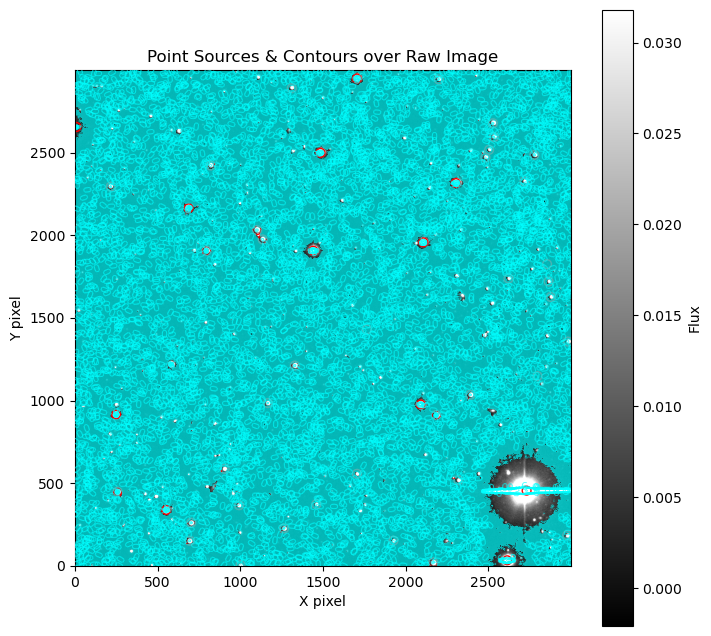

In [12]:
plt.figure(figsize=(8,8))
plt.imshow(img_data, origin='lower', cmap='gray',
           vmin=np.percentile(img_data,5),
           vmax=np.percentile(img_data,99))
plt.colorbar(label='Flux')

contours = plt.contour(img_data, levels=5, colors='cyan', alpha=0.7)
plt.clabel(contours, inline=True, fontsize=8, fmt='%1.0f')

plt.scatter(point_sources['X_IMAGE'], point_sources['Y_IMAGE'],
            s=40, edgecolor='red', facecolors='none', marker='o')

plt.title('Point Sources & Contours over Raw Image')
plt.xlabel('X pixel')
plt.ylabel('Y pixel')
plt.show()

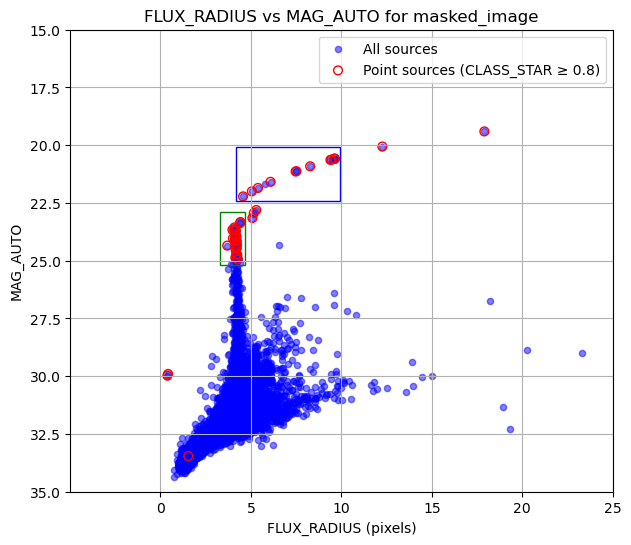

In [13]:
columns = []
with open(cat_file, 'r') as f:
    for line in f:
        if line.startswith('#'):
            parts = line.replace('#','').strip().split()
            if len(parts) >= 2:
                columns.append(parts[1])
        else:
            break

catalog = pd.read_csv(cat_file, comment='#', sep=r'\s+', names=columns)
point_sources = catalog[catalog['CLASS_STAR'] >= 0.8]

# --- 2. Plotting ---
plt.figure(figsize=(7, 6))

# Main Scatter Plots
plt.scatter(catalog['FLUX_RADIUS'], catalog['MAG_AUTO'], 
            s=20, color='blue', alpha=0.5, label='All sources')

plt.scatter(point_sources['FLUX_RADIUS'], point_sources['MAG_AUTO'], 
            s=40, edgecolor='red', facecolors='none', label='Point sources (CLASS_STAR ≥ 0.8)')

# --- 3. Adding ONLY the Two Rectangular Patches ---
ax = plt.gca()

patch1 = patches.Rectangle((3.3, 22.9), 1.4, 2.3, 
                         linewidth=1, edgecolor='green', facecolor='none', alpha=1.0)
patch2 = patches.Rectangle((4.2, 20.1), 5.7, 2.3, 
                         linewidth=1, edgecolor='blue', facecolor='none', alpha=1.0)

ax.add_patch(patch1)
ax.add_patch(patch2)

# --- 4. Formatting ---
plt.xlim(right=25)
plt.ylim([35, 15]) # Inverted Y-axis

plt.xlabel('FLUX_RADIUS (pixels)')
plt.ylabel('MAG_AUTO')
plt.title(f'FLUX_RADIUS vs MAG_AUTO for {base_name}')
plt.legend()
plt.grid(True)

plt.show()

In [14]:
fits_path = '/home/raditraian1107/PSF_development/FITS_images/masked_image.fits'
cat_path  = '/home/raditraian1107/PSF_development/FITS_images/se_in_out/outparams_cutout_251.0256_36.4566.cat'
out_dir   = "cutouts_test"
os.makedirs(out_dir, exist_ok=True)

h = fits.open(fits_path)
img = h[0].data
h.close()

if img.ndim == 3:
    img = img[0]

ny, nx = img.shape
print(f"Image shape: {nx} x {ny}")

cat = pd.read_csv(cat_path, comment='#', sep=r'\s+', header=None)
cat.columns = [
    'NUMBER', 'FLUX_AUTO', 'MAG_AUTO', 'MAGERR_AUTO',
    'X_IMAGE', 'Y_IMAGE', 'FLAGS', 'CLASS_STAR', 'FLUX_RADIUS'
]

size_counts = {600:0, 150:0, 50:0}
for mag, cls in zip(cat['MAG_AUTO'], cat['CLASS_STAR']):
    if cls <= 0.8:
        continue
    if 17 <= mag < 20:
        size_counts[600] += 1
    elif 20 <= mag < 24:
        size_counts[150] += 1
    else:
        size_counts[50] += 1

print("Cutout counts:", size_counts)

saved_files = 0
for idx, row in cat.iterrows():
    x, y = row['X_IMAGE'], row['Y_IMAGE']
    mag, cls = row['MAG_AUTO'], row['CLASS_STAR']

    if cls <= 0.8:
        continue
    if 17 <= mag < 20:
        size = 600
    elif 20 <= mag < 23.5:
        size = 150
    else:
        size = 50

    cut = Cutout2D(img, (x, y), (size, size), mode='partial', fill_value=0)
    filename = os.path.join(out_dir, f"cutout_{idx}.fits")
    fits.writeto(filename, cut.data.astype('float32'), overwrite=True)
    saved_files += 1

print(f"Saved cutouts: {saved_files}")
print(f"Files saved in directory: {out_dir}")

Image shape: 3000 x 3000
Cutout counts: {600: 2, 150: 26, 50: 21}
Saved cutouts: 49
Files saved in directory: cutouts_test


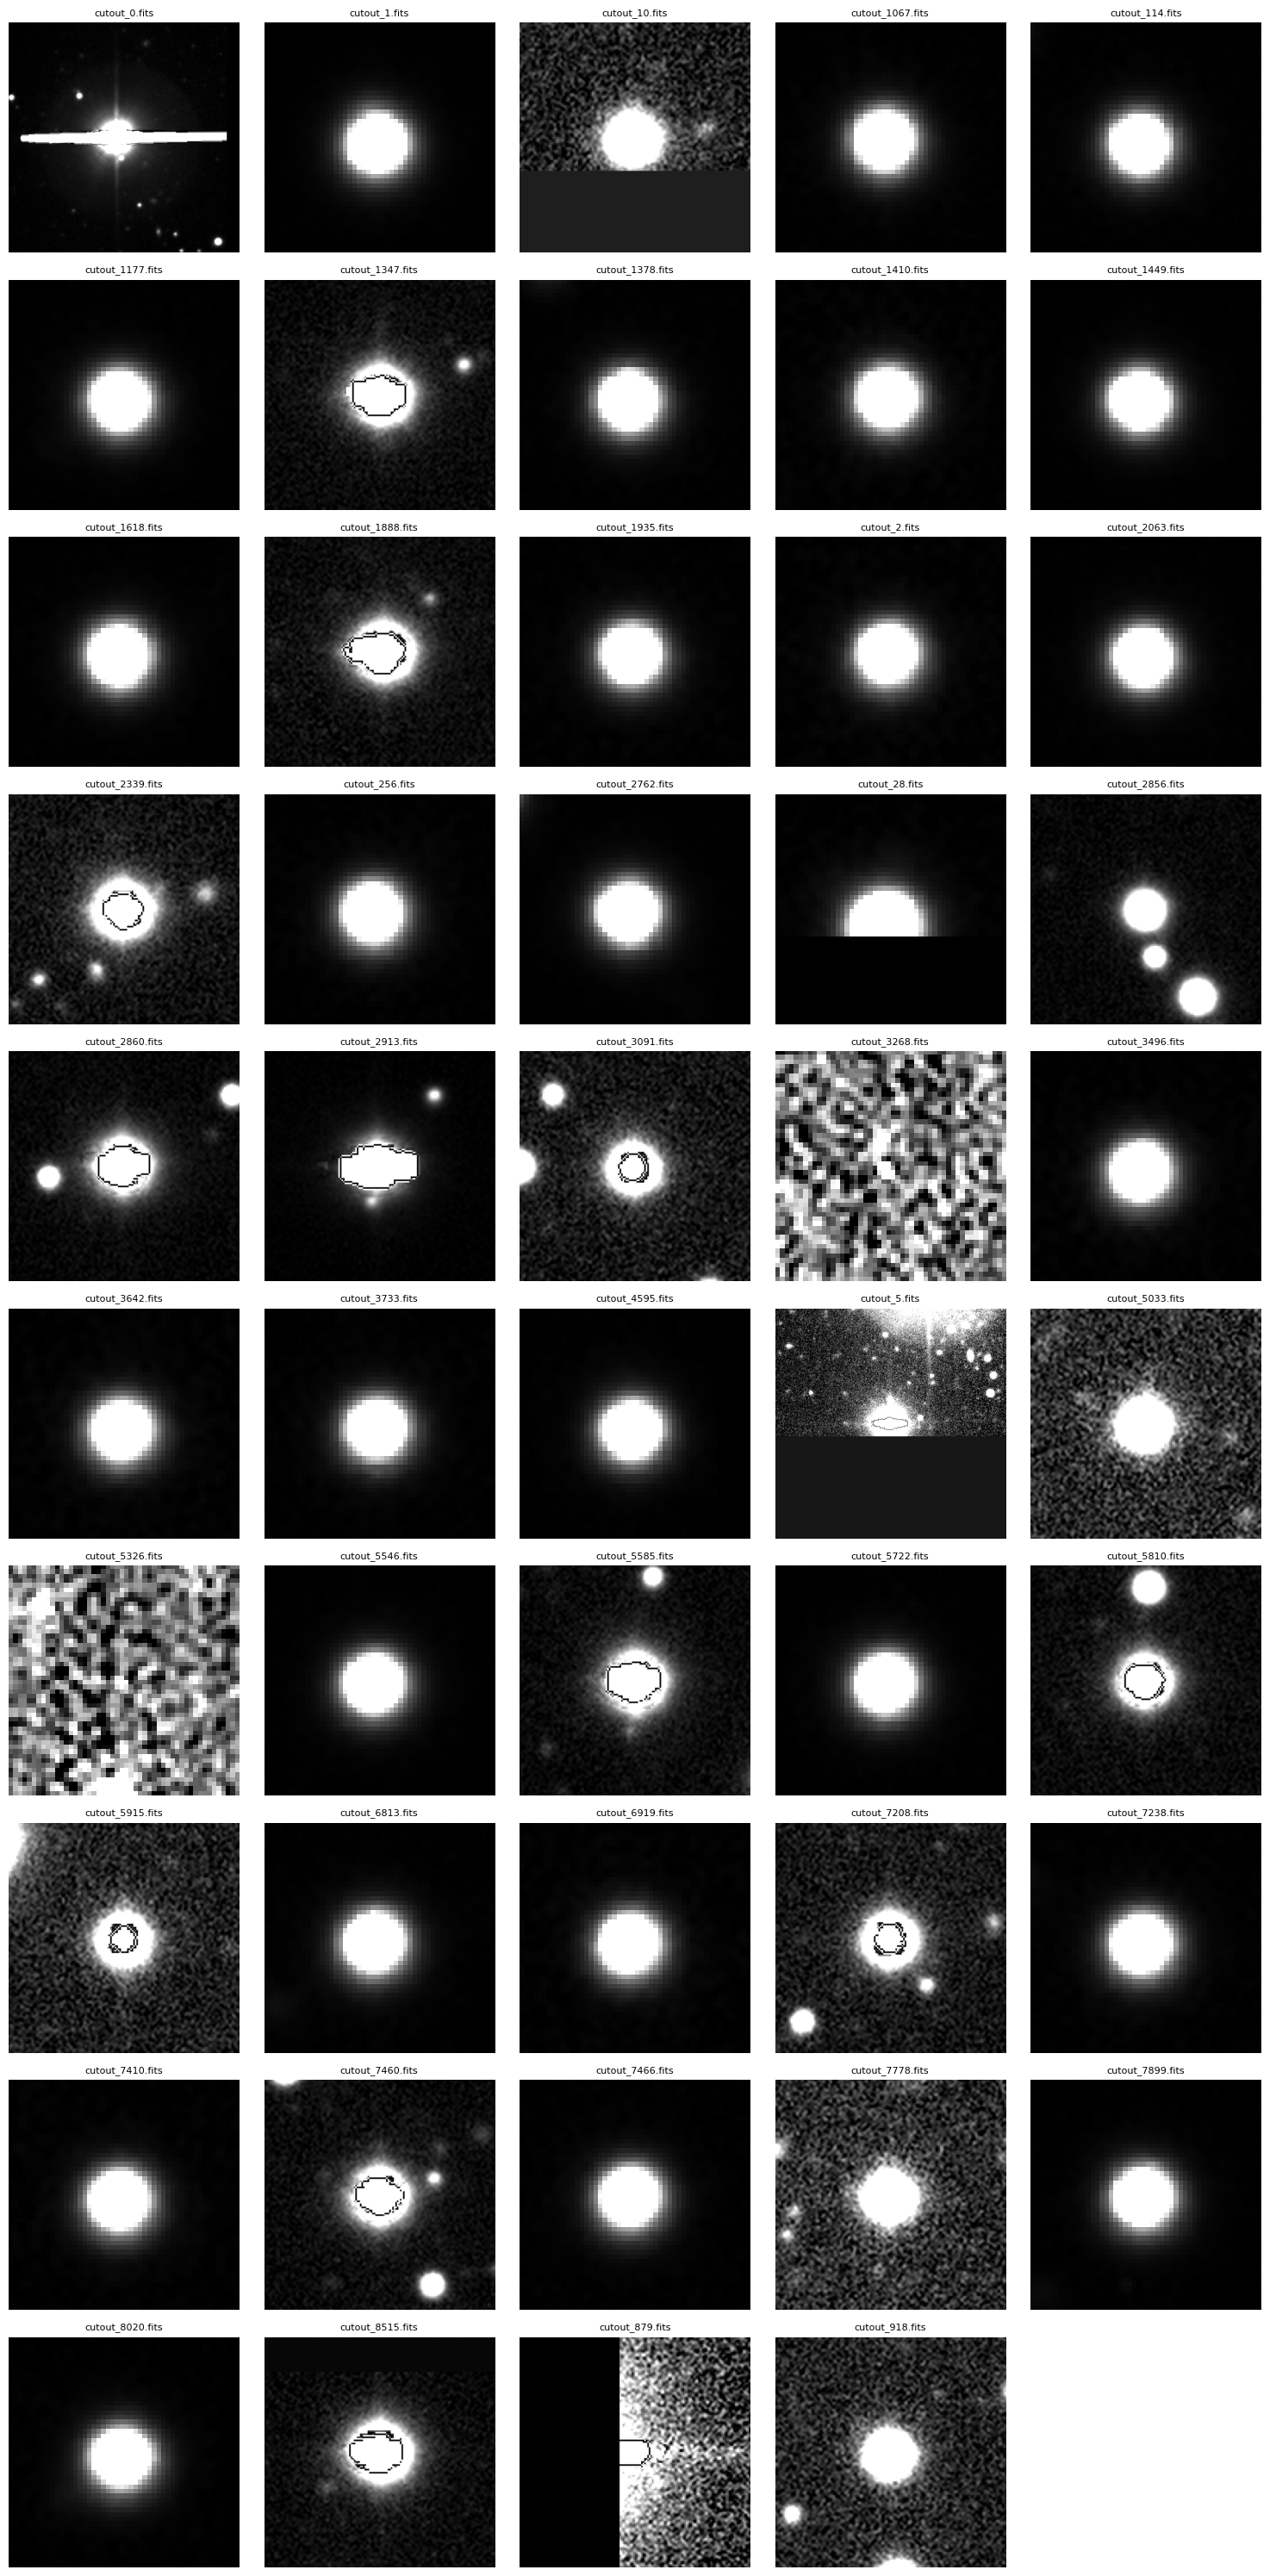

In [15]:
import os
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

out_dir = "cutouts_test"
cutout_files = sorted([f for f in os.listdir(out_dir) if f.endswith('.fits')])

n_cols = 5
n_rows = int(np.ceil(len(cutout_files) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3*n_rows))
axes = axes.flatten()  # flatten in case of single row/column

for ax, fname in zip(axes, cutout_files):
    path = os.path.join(out_dir, fname)
    data = fits.getdata(path)

    ax.imshow(data, origin='lower', cmap='gray', vmin=np.percentile(data, 5), vmax=np.percentile(data, 95))
    ax.set_title(fname, fontsize=8)
    ax.axis('off')

# Turn off any extra axes
for ax in axes[len(cutout_files):]:
    ax.axis('off')

plt.tight_layout()
plt.show()
